## Staticstics Advance-2


Question 1: What are Type I and Type II errors in hypothesis testing, and how do they impact decision-making?

    Type I Error (α): Occurs when we reject a true null hypothesis.
    → It’s a false positive (detecting an effect when there isn’t one).
    
    Type II Error (β): Occurs when we fail to reject a false null hypothesis.
    → It’s a false negative (missing a real effect).
    
    Impact on decision-making:
    
    Type I error leads to incorrect conclusions that something significant exists.
    
    Type II error leads to missed opportunities to identify real effects.
    Researchers balance both using appropriate sample sizes and significance levels.

Question 2: What is the P-value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?

    The P-value is the probability of obtaining test results at least as extreme as the observed results, assuming the null hypothesis is true.
    
    Interpretation:
    
    If P-value ≤ α (e.g., 0.05) → Reject the null hypothesis (significant evidence).
    
    If P-value > α → Fail to reject the null hypothesis (insufficient evidence).
    
    Smaller P-values indicate stronger evidence against the null hypothesis.

Question 3: Explain the difference between a Z-test and a T-test, including when to use each.

    A Z-test is used when the population standard deviation is known and the sample size is large (generally n ≥ 30). It assumes the data follows a normal distribution.
    A T-test is used when the population standard deviation is unknown or the sample size is small (n < 30). It uses the t-distribution to estimate variability.
    
    In short, use the Z-test for large samples with known variance, and the T-test for small samples or unknown variance.

Question 4: What is a confidence interval, and how does the margin of error influence its width and interpretation?
    
    A confidence interval (CI) gives a range of values likely to contain the true population parameter.
    
    𝐶𝐼=𝑥ˉ± Margin of Error
    
    The margin of error depends on sample variability and confidence level.
    
    Larger margin of error → wider CI (more uncertainty).
    
    Smaller margin of error → narrower CI (more precision).
    
    For example, a 95% CI means we are 95% confident the true mean lies within that interval.

Question 5: Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?

    Purpose:
    ANOVA (Analysis of Variance) tests whether the means of three or more groups are significantly different.
    
    Assumptions:
    
    Samples are independent.
    
    Populations are normally distributed.
    
    Variances across groups are equal (homogeneity of variance).
    
    Extension:
    While a t-test compares 2 means, ANOVA compares multiple group means simultaneously, controlling for Type I error.

In [1]:
# 6. Write a Python program to perform a one-sample Z-test and interpret the result for a given dataset.
import numpy as np
from scipy import stats

# Example data
data = [52, 49, 50, 48, 51, 47, 53, 52, 50, 49]
population_mean = 50
population_std = 2  # known population standard deviation
n = len(data)

# Z-test
sample_mean = np.mean(data)
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: Mean is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


Z-score: 0.16
P-value: 0.8744
Fail to reject the null hypothesis: No significant difference.


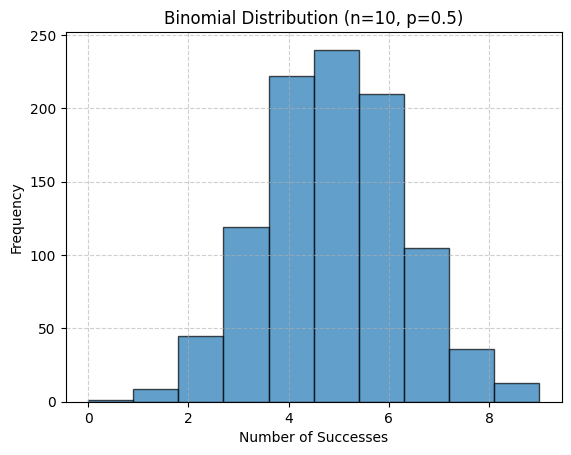

In [2]:
#7. Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using NumPy and plot the histogram.
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 samples
data = np.random.binomial(n=10, p=0.5, size=1000)

# Plot histogram
plt.hist(data, bins=10, edgecolor='black', alpha=0.7)
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


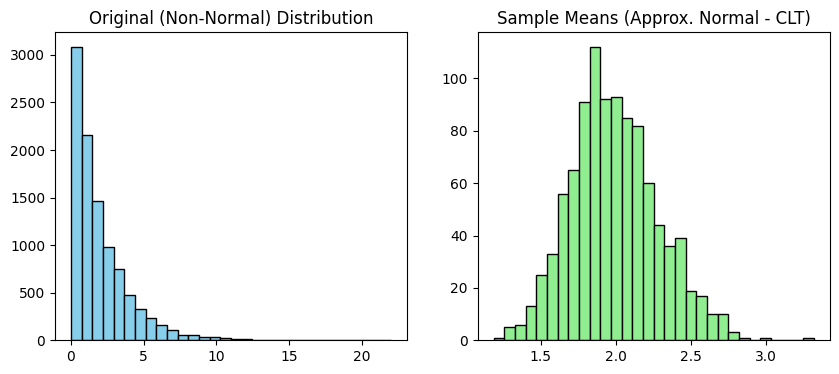

In [3]:
#8. Generate multiple samples from a non-normal distribution and implement the Central Limit Theorem using Python.
import numpy as np
import matplotlib.pyplot as plt

# Generate non-normal data (exponential distribution)
data = np.random.exponential(scale=2, size=10000)

# Apply CLT: take means of multiple samples
sample_means = [np.mean(np.random.choice(data, size=50)) for _ in range(1000)]

# Plot original vs sample mean distribution
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title("Original (Non-Normal) Distribution")

plt.subplot(1,2,2)
plt.hist(sample_means, bins=30, color='lightgreen', edgecolor='black')
plt.title("Sample Means (Approx. Normal - CLT)")
plt.show()


Mean = 50.40
95% Confidence Interval: (49.28, 51.53)


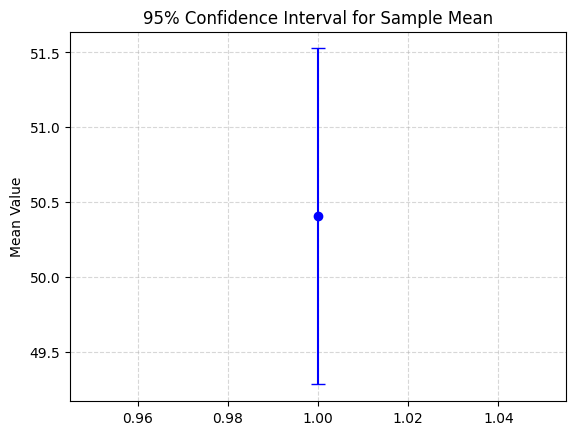

In [4]:
#9 . Write a Python function to calculate and visualize the confidence interval for a sample mean.
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + confidence) / 2, len(data) - 1)
    lower, upper = mean - h, mean + h

    print(f"Mean = {mean:.2f}")
    print(f"{int(confidence*100)}% Confidence Interval: ({lower:.2f}, {upper:.2f})")

    # Visualization
    plt.errorbar(1, mean, yerr=h, fmt='o', color='blue', capsize=5)
    plt.title(f"{int(confidence*100)}% Confidence Interval for Sample Mean")
    plt.ylabel("Mean Value")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Example usage
data = np.random.normal(50, 5, 100)
plot_confidence_interval(data)


In [ ]:
#10. Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome.
from scipy.stats import chisquare

# Example data
observed = [50, 30, 20]
expected = [40, 40, 20]

# Perform Chi-square test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-square Statistic: {chi_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: Observed distribution differs significantly.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")
